#**M2 New Taipei City Real Estate Valuation Dataset**

The data associated with this notebook can be downloaded here: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set



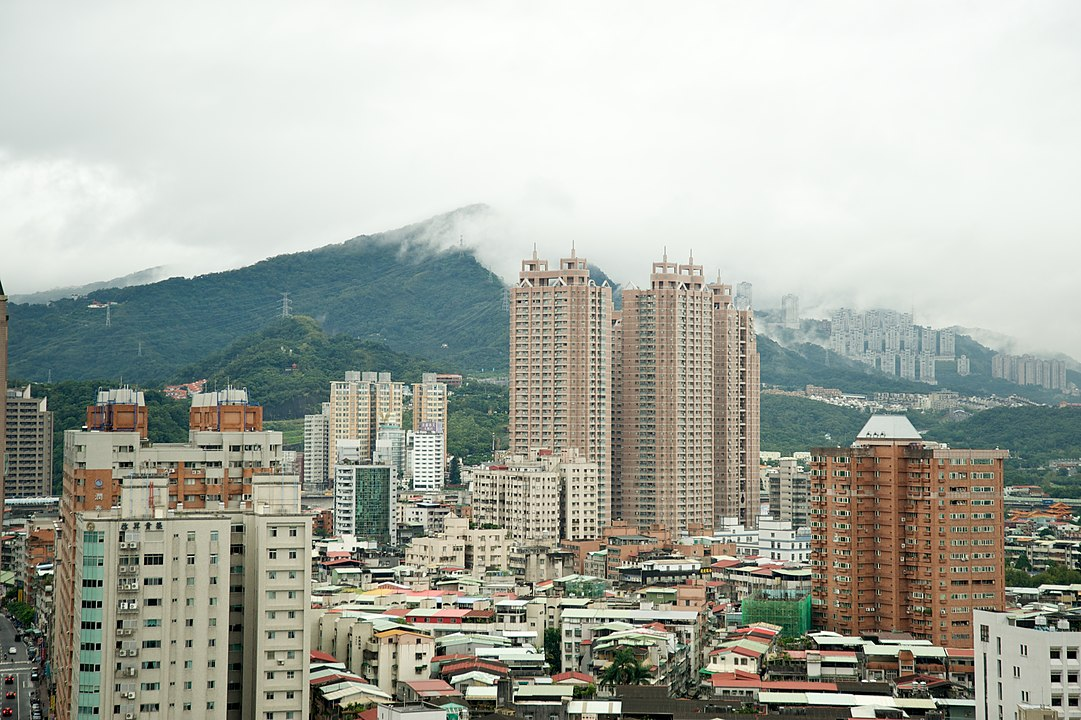

By Fred Hsu on en.wikipedia - Photo taken and uploaded by user, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=9600721

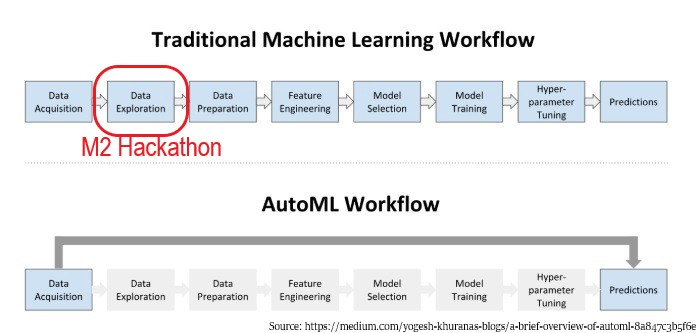

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**
Sinyi Realty (信義房屋) is looking to develop a broad valuation story for investors in the New Taipei City real estate market using the features of the New Taipei City real estate valuation dataset. The business problem in this notebook is to explore the New Taipei City real estate valuation data with a view to a) identifying data preparation needs for development of a machine learning regressor that can predict property values, and b) form inferences about relationships between the features and identify possible strong predictors of property value.




#**BLUF**
(Bottom Line Up Front)

Using two regressors (the RandomForestRegressor and XGBRegressor), we find that walking distance to the nearest MRT station is a significant driver of real estate value (especially those properties within about 1km of a station). Age and latitude are also important, with price decreasing, respectively increasing with age, respectively latitude.

#**Libraries**


In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [ ]:
# pip is a package-management system written in Python used to install and manage software packages.[5] It connects to an online repository of public packages, called the Python Package Index. pip can also be configured to connect to other package repositories (local or remote), provided that they comply to Python Enhancement Proposal 503
# For more see this: https://en.wikipedia.org/wiki/Pip_(package_manager)
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [ ]:
# !pip install autoviz    # Installs AutoViz
# #importing Autoviz class
# from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
# AV = AutoViz_Class()

#**Data**
The following is adaptedfrom https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

The market historical data set of real estate valuation were collected from Sindian Dist., New Taipei City, Taiwan. 

Data Dictionary:

The predictors/deatires are as follows:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The target is as follows:
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [ ]:
# Read data from UCI Machine Learning Repo
file_ = "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"   # adapt this as needed to the file structure on your Google drive
df = pd.DataFrame(pd.read_excel(file_)) # read in csv file

In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head())

# Drop the index column (Column 0, "No")
if 'No' in df.columns:                              # Note how the if statement checks whether the 'No' column is present. If it's not, an error is thrown
  df = df.drop(["No"], axis = 1)

# The column names are verbose, so rename them (optional)
df.rename(columns = {"X1 transaction date": "X1_Date", "X2 house age": "X2_Age", "X3 distance to the nearest MRT station": "X3_MRT", "X4 number of convenience stores": "X4_Stores", "X5 latitude": "X5_Lat", "X6 longitude": "X6_Long", "Y house price of unit area": "Y_Price"},inplace = True)
print("\n\nAfter Renaming:\n\n",df.head())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 

HEAD of df
    No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746    

#**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded 
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method. 

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Conclusion: no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X1_Date    414 non-null    float64
 1   X2_Age     414 non-null    float64
 2   X3_MRT     414 non-null    float64
 3   X4_Stores  414 non-null    int64  
 4   X5_Lat     414 non-null    float64
 5   X6_Long    414 non-null    float64
 6   Y_Price    414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
None


Missing Values
 X1_Date      0
X2_Age       0
X3_MRT       0
X4_Stores    0
X5_Lat       0
X6_Long      0
Y_Price      0
dtype: int64


#**Duplicates**

It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior.
Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:
* Generally, remove duplicates
* Duplicates may not impact model quality very much if there are only a small number
* Pandas: df = df.drop_duplicates()


In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


#**Descriptive Statistics**

Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.  

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

# Conclusion: X3_MRT and X6_Long can benefit from skewness correction

UNIVARIATE DESCRIPTIVE STAT using pandas
            count         mean          std          min          25%  \
X1_Date    414.0  2013.148953     0.281995  2012.666667  2012.916667   
X2_Age     414.0    17.712560    11.392485     0.000000     9.025000   
X3_MRT     414.0  1083.885689  1262.109595    23.382840   289.324800   
X4_Stores  414.0     4.094203     2.945562     0.000000     1.000000   
X5_Lat     414.0    24.969030     0.012410    24.932070    24.963000   
X6_Long    414.0   121.533361     0.015347   121.473530   121.528085   
Y_Price    414.0    37.980193    13.606488     7.600000    27.700000   

                   50%          75%          max  
X1_Date    2013.166667  2013.416667  2013.583333  
X2_Age       16.100000    28.150000    43.800000  
X3_MRT      492.231300  1454.279000  6488.021000  
X4_Stores     4.000000     6.000000    10.000000  
X5_Lat       24.971100    24.977455    25.014590  
X6_Long     121.538630   121.543305   121.566270  
Y_Price      38.450000  

CORRELATION MATRIX
             X1_Date    X2_Age    X3_MRT  X4_Stores    X5_Lat   X6_Long  \
X1_Date    1.000000  0.017542  0.060880   0.009544  0.035016 -0.041065   
X2_Age     0.017542  1.000000  0.025622   0.049593  0.054420 -0.048520   
X3_MRT     0.060880  0.025622  1.000000  -0.602519 -0.591067 -0.806317   
X4_Stores  0.009544  0.049593 -0.602519   1.000000  0.444143  0.449099   
X5_Lat     0.035016  0.054420 -0.591067   0.444143  1.000000  0.412924   
X6_Long   -0.041065 -0.048520 -0.806317   0.449099  0.412924  1.000000   
Y_Price    0.087529 -0.210567 -0.673613   0.571005  0.546307  0.523287   

            Y_Price  
X1_Date    0.087529  
X2_Age    -0.210567  
X3_MRT    -0.673613  
X4_Stores  0.571005  
X5_Lat     0.546307  
X6_Long    0.523287  
Y_Price    1.000000  





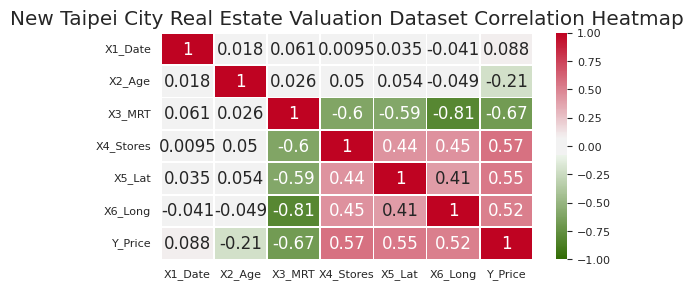



COVARIANCE MATRIX
              X1_Date      X2_Age        X3_MRT    X4_Stores    X5_Lat  \
X1_Date     0.079521    0.056357  2.166777e+01     0.007928  0.000123   
X2_Age      0.056357  129.788704  3.684082e+02     1.664189  0.007694   
X3_MRT     21.667774  368.408249  1.592921e+06 -2239.938319 -9.257892   
X4_Stores   0.007928    1.664189 -2.239938e+03     8.676334  0.016236   
X5_Lat      0.000123    0.007694 -9.257892e+00     0.016236  0.000154   
X6_Long    -0.000178   -0.008483 -1.561822e+01     0.020302  0.000079   
Y_Price     0.335847  -32.640356 -1.156787e+04    22.885163  0.092249   

             X6_Long       Y_Price  
X1_Date    -0.000178      0.335847  
X2_Age     -0.008483    -32.640356  
X3_MRT    -15.618216 -11567.871845  
X4_Stores   0.020302     22.885163  
X5_Lat      0.000079      0.092249  
X6_Long     0.000236      0.109273  
Y_Price     0.109273    185.136507  





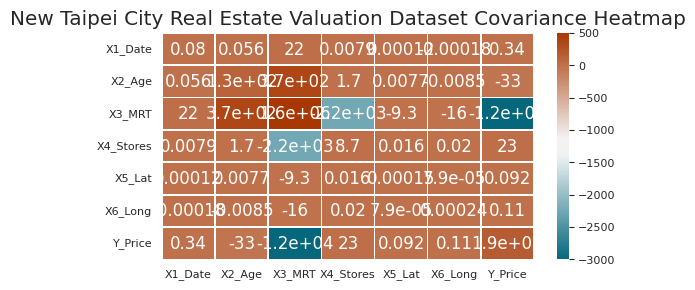

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("New Taipei City Real Estate Valuation Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -3000, vmax = 500, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("New Taipei City Real Estate Valuation Dataset Covariance Heatmap")
plt.show()

# X4_Stores, X5_Lat and X6_Long features are highly correleated with the target
# Location location location (and the metro!)
# High covariance between X3 and X4 and X3 and the target


Skewness may be interpreted and accounted for as follows: 
* (-0.5,+0.5): negligible skewness/near normal (do not correct)
* (-1,-0.5] or [0.5,1) - moderate skewness (do not correct)
* (-∞,-1] or [1,∞): significant skewness (correct)

Skewness correction is done to "uncrowd" the data, and may improve ML algorithm performance.

Kurtosis is a measure of the heaviness of the tails of a distribution. High values suggest the presence of many extreme values.


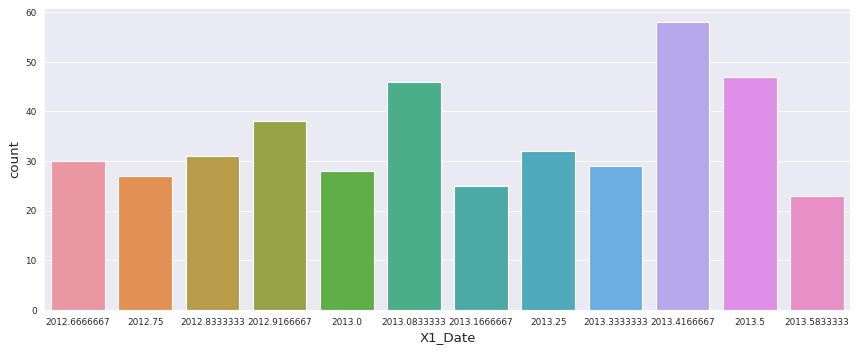

In [ ]:
# Explore X1_Date
figure(figsize=(13, 5), dpi=80)
sns.countplot(x = 'X1_Date', data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5921c5d90>,
      dtype=object)

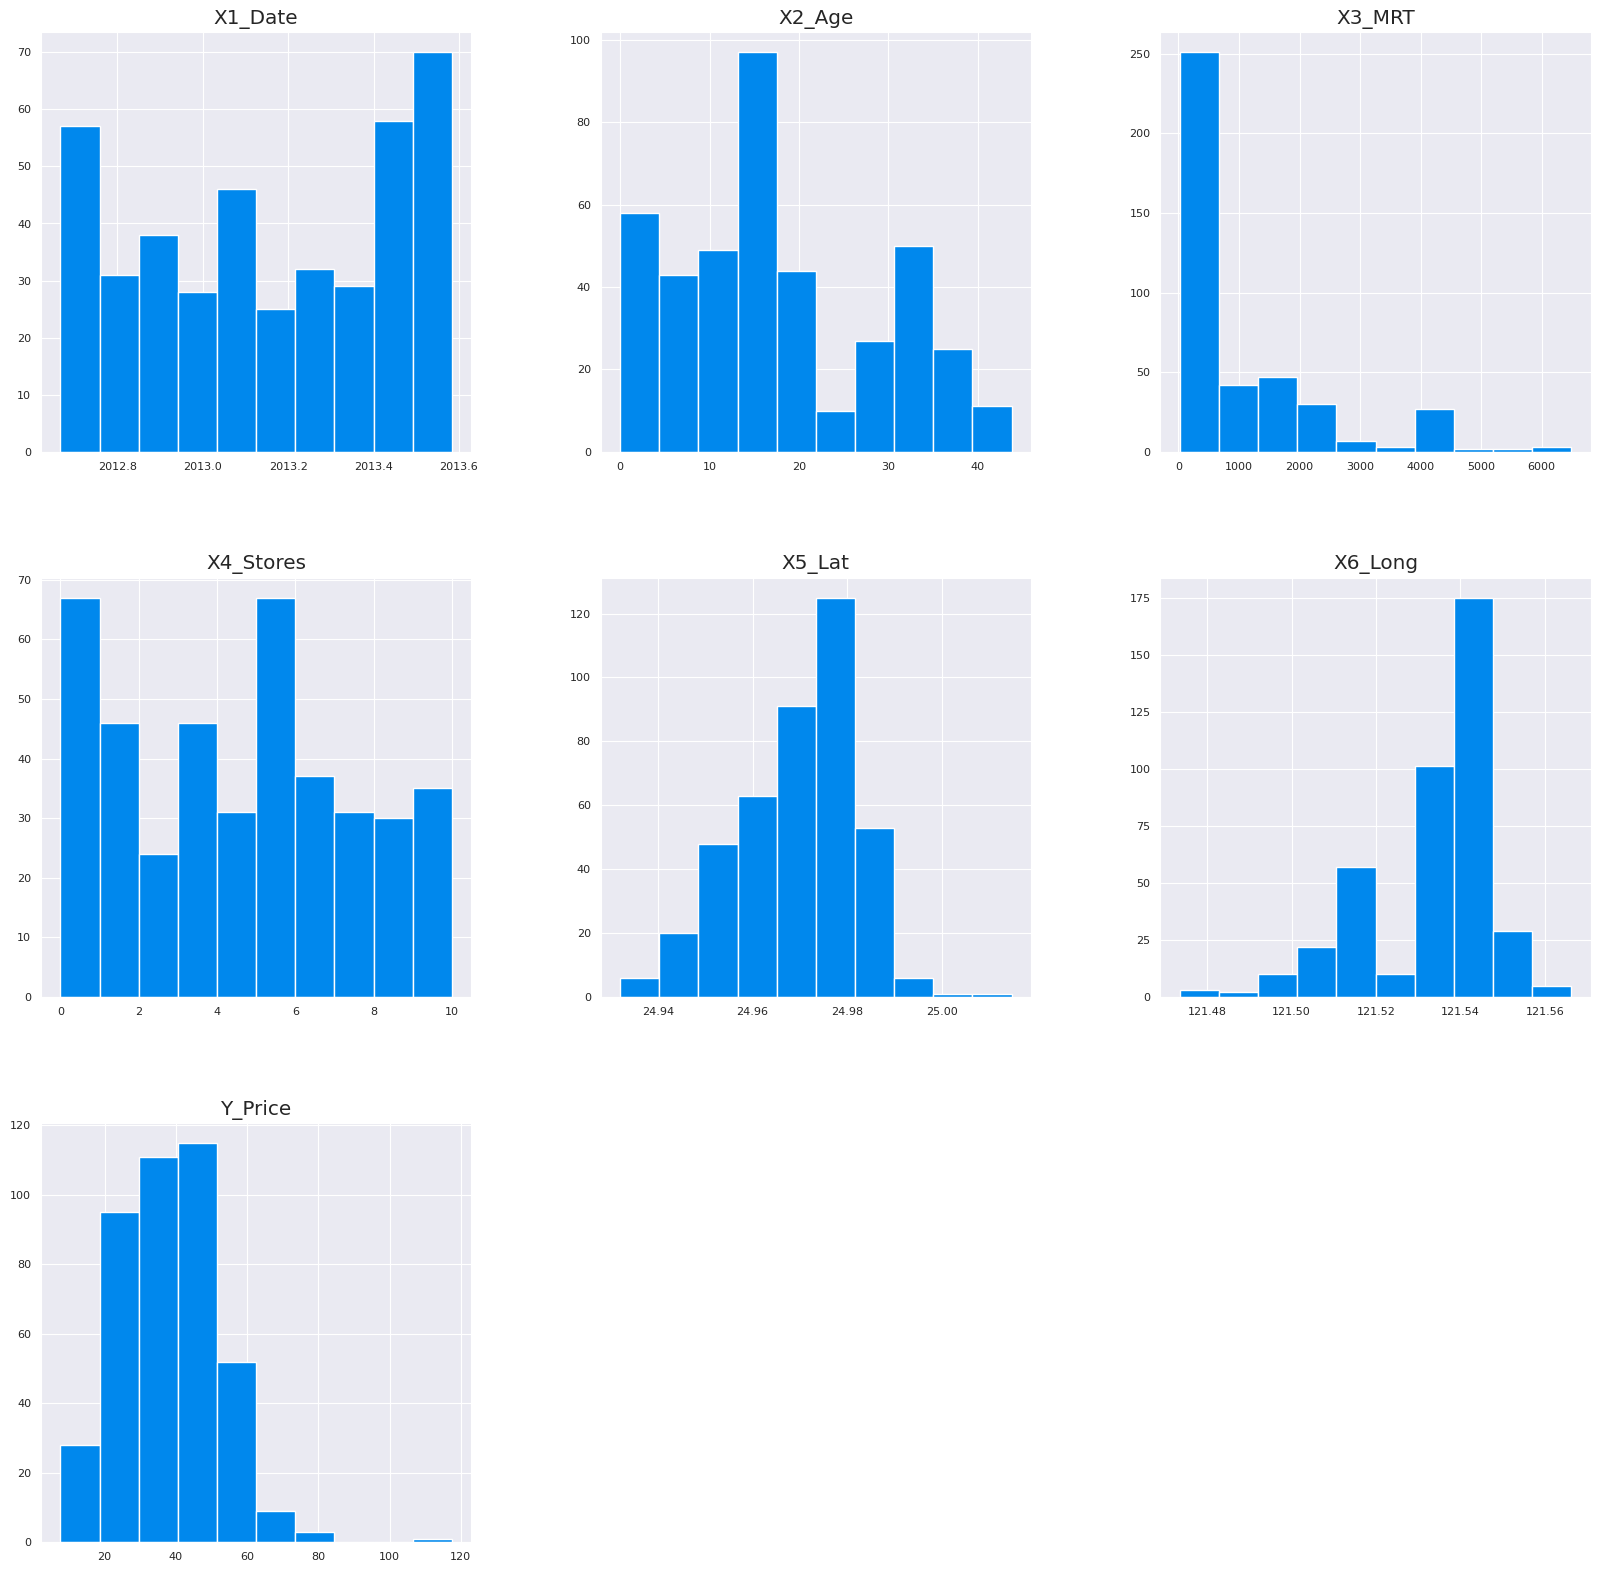

In [ ]:
# Histograms
df.hist(figsize=(20,20))

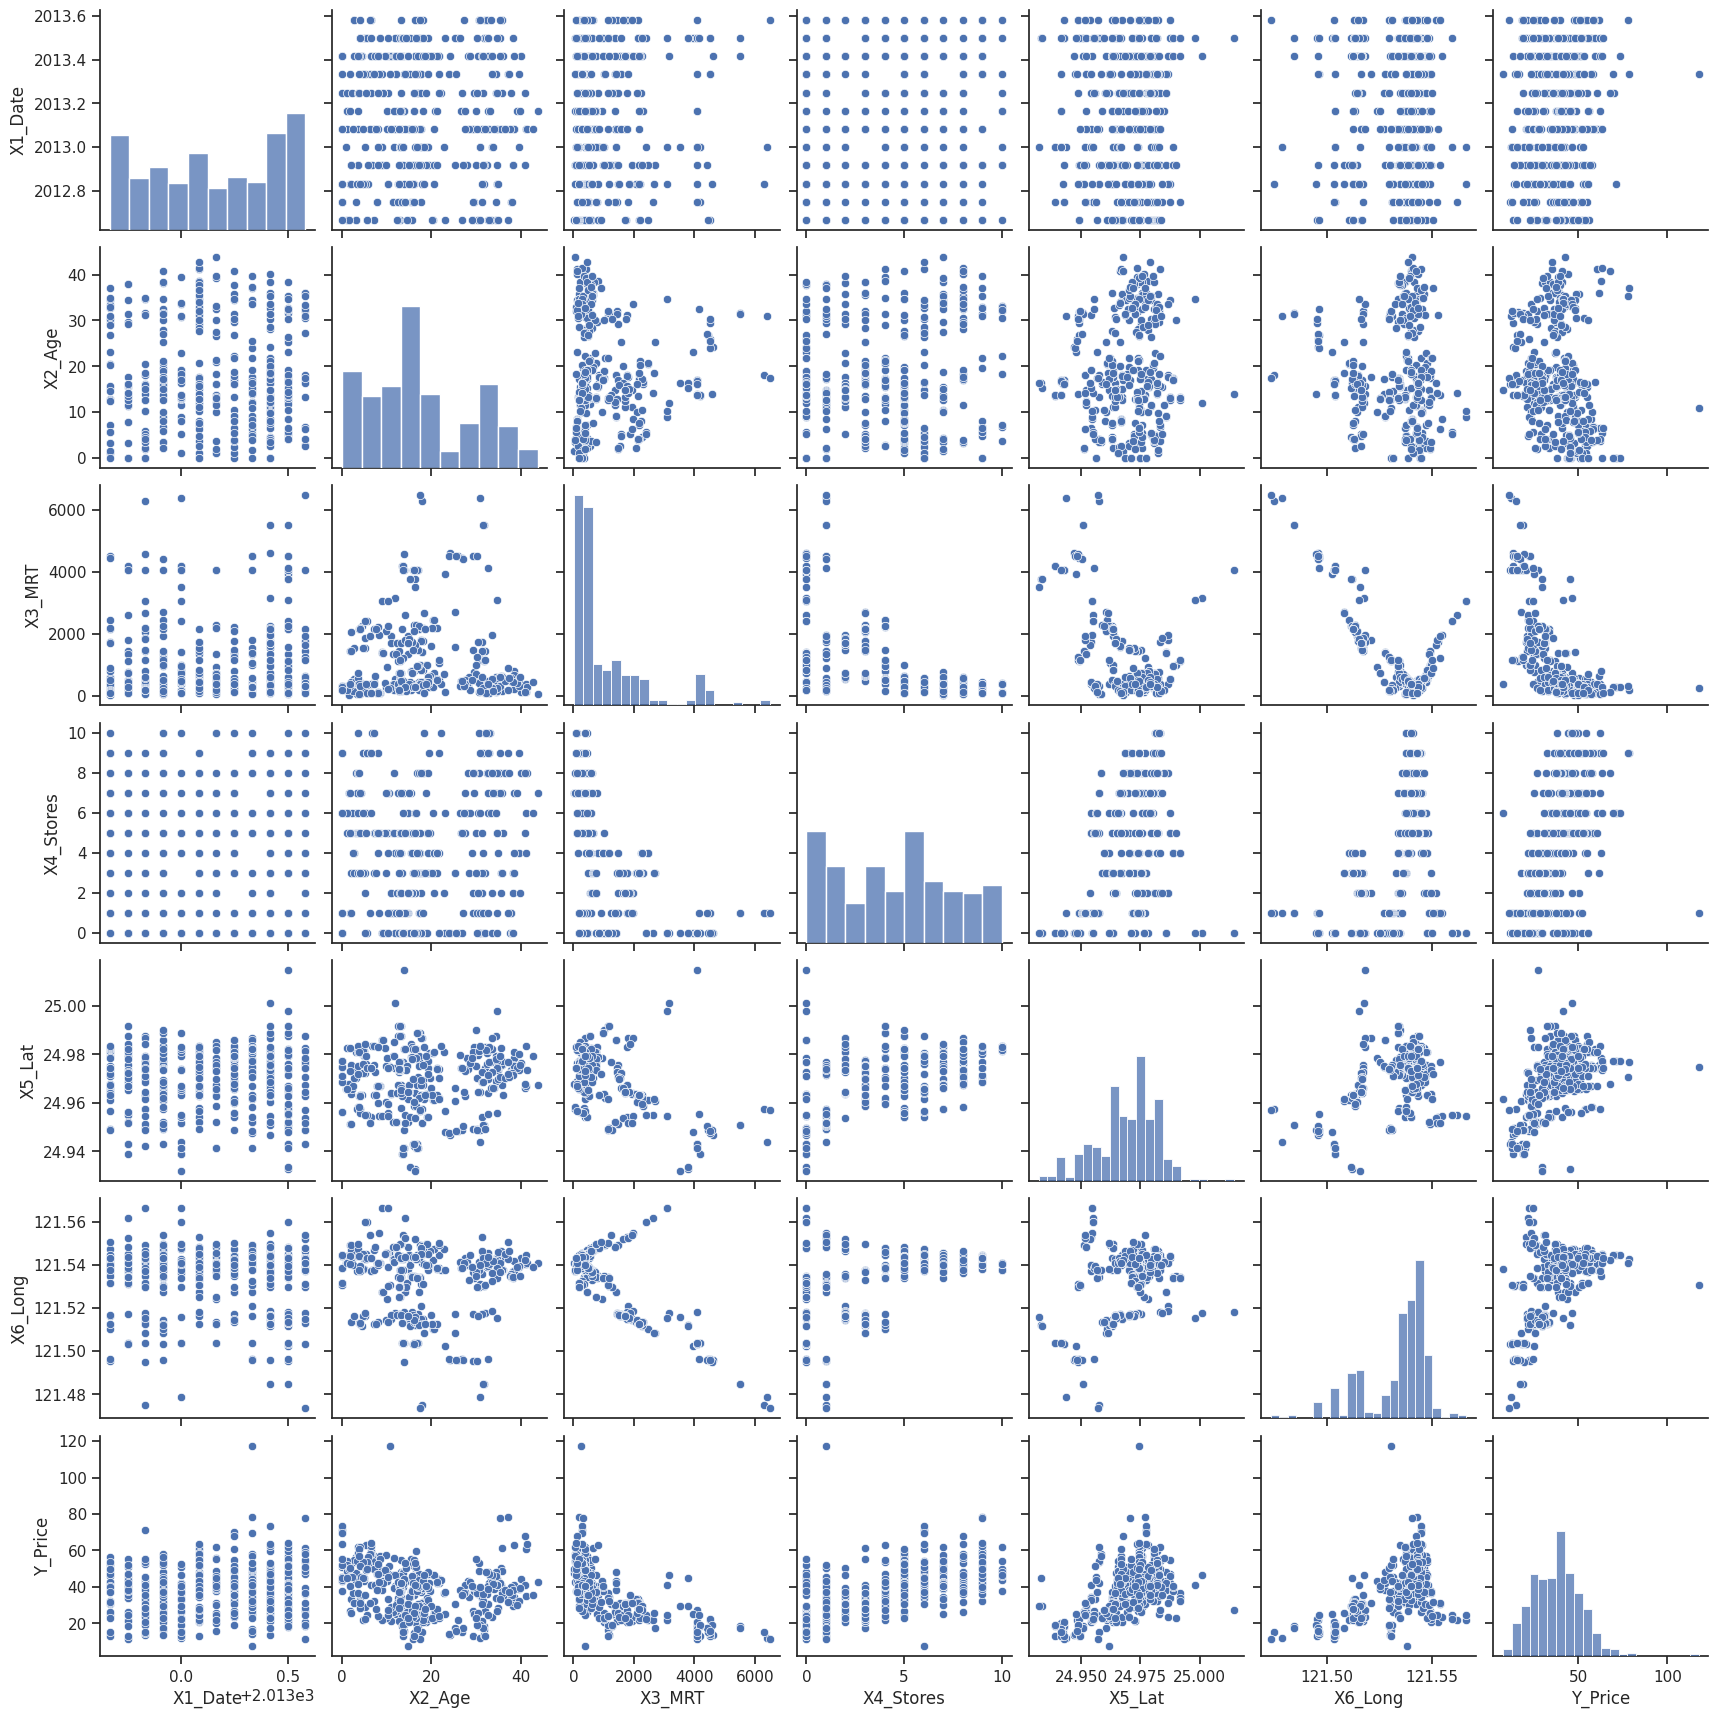

In [ ]:
# Bivariate Graphical Descriptive Statistics
#Scatterplot matrix - these can take some time to gerenerate if the number of featires is large
sns.set_theme(style="ticks")
sns.pairplot(df)

# Outliers noticeable (one in particular)

No handles with labels found to put in legend.


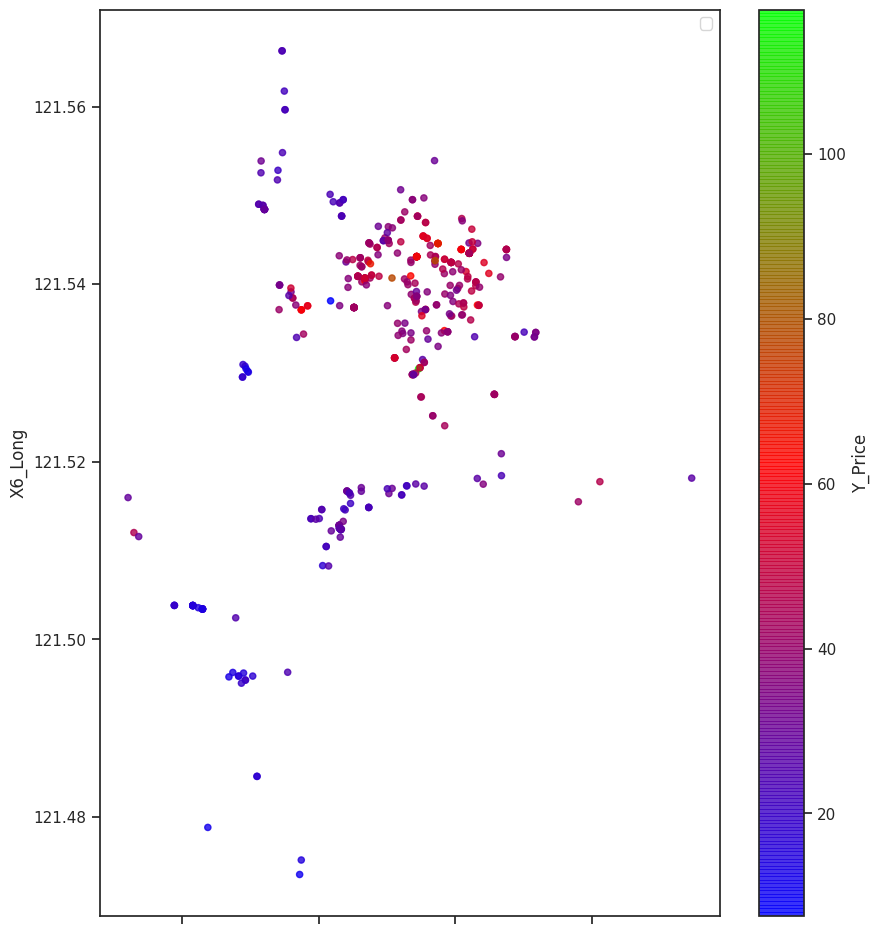

In [ ]:
# Explore X5_Lat and X6_Long by Y_Price
df.plot(kind="scatter",x="X5_Lat",y="X6_Long",c='Y_Price', cmap=plt.get_cmap("brg"),
    colorbar=True, alpha=0.8, figsize=(10,12))
plt.legend()
plt.show()

# More expensive properties generally in the northeast

12 12


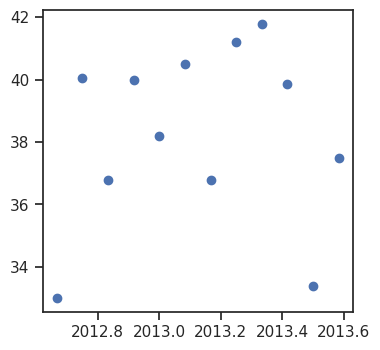

In [ ]:
# visualise the evolution of median house price by X1_Date
x=list(df.X1_Date.unique())
y=list(df.groupby(["X1_Date"])['Y_Price'].median())
print(len(x),len(y))
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x,y)

# No noticeable trend in median price over time.

# **Interactive Visualizations**

In [ ]:
# Plotly
fig = px.scatter_3d(df, z='X4_Stores', y='Y_Price', x='X3_MRT', hover_name='Y_Price')
# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 



<IPython.core.display.Javascript object>

#**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


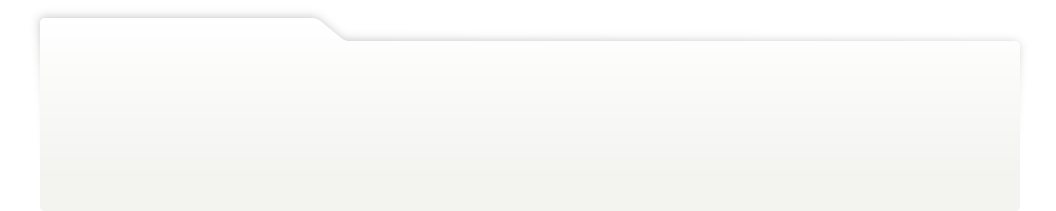
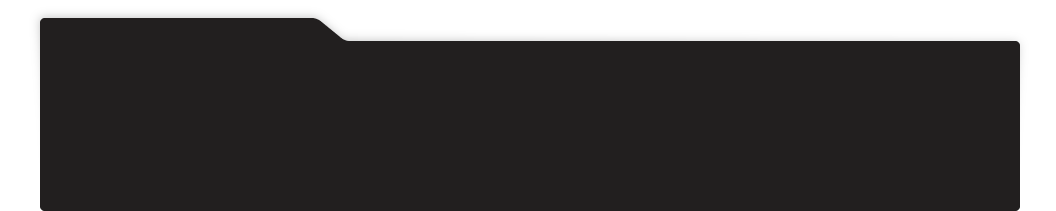
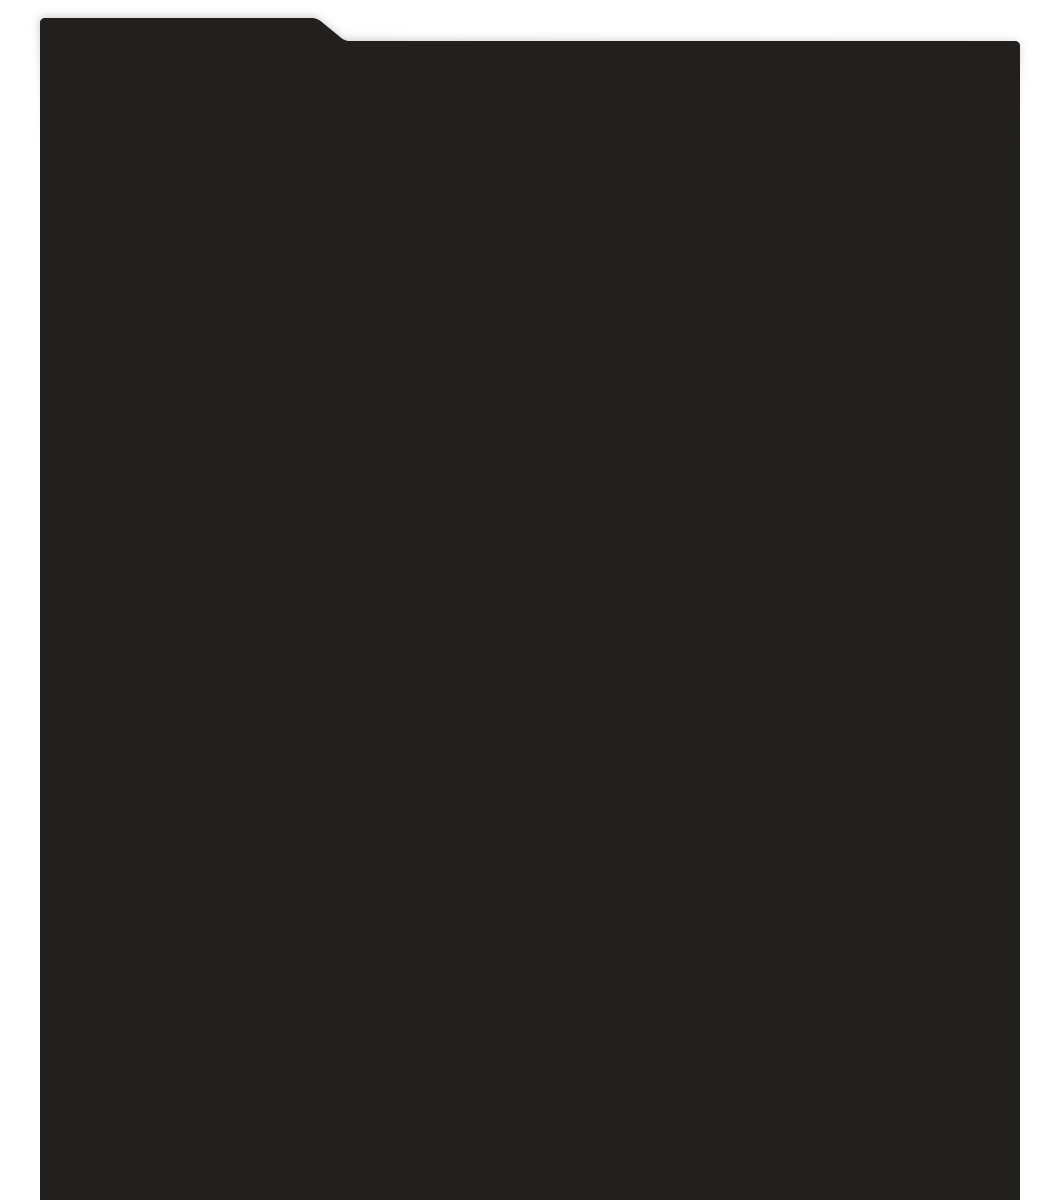
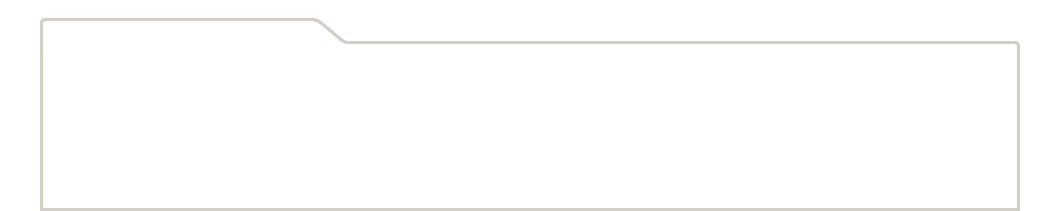
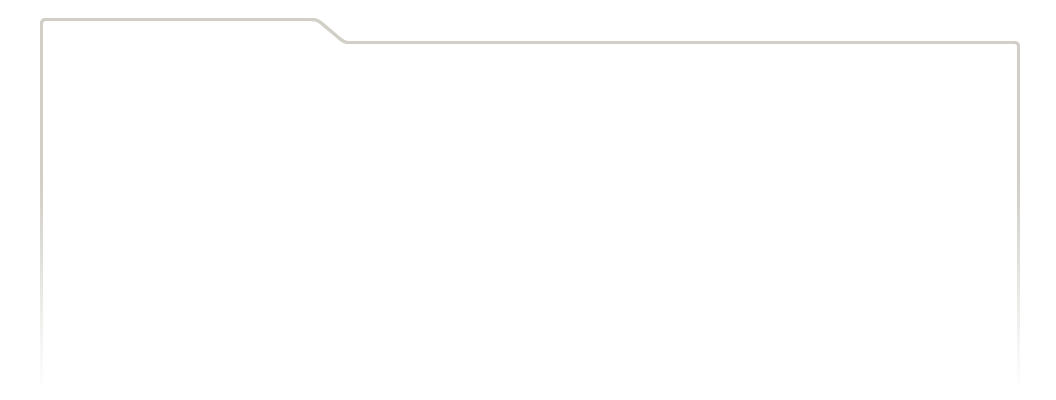
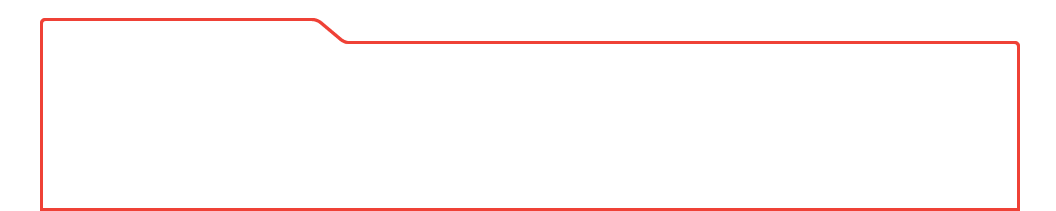
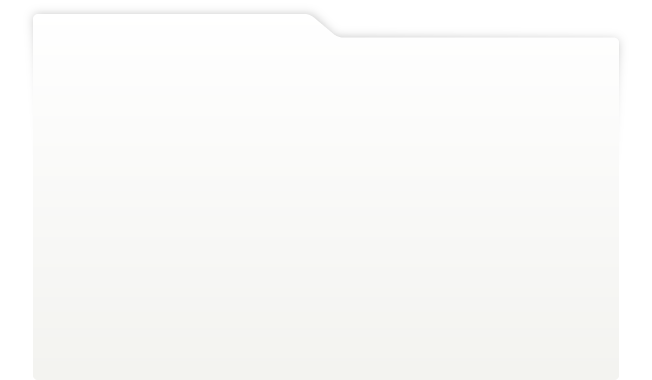
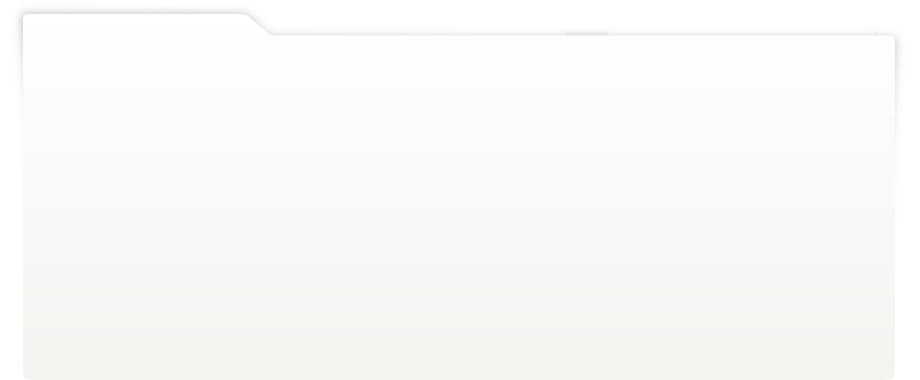
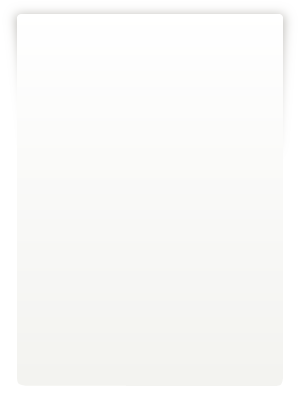
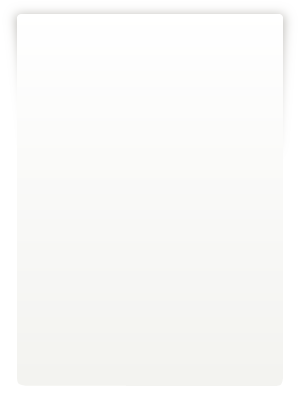
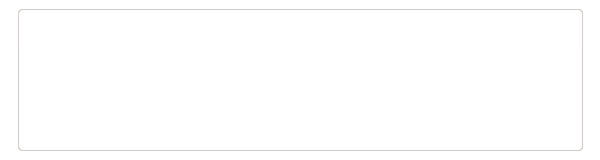
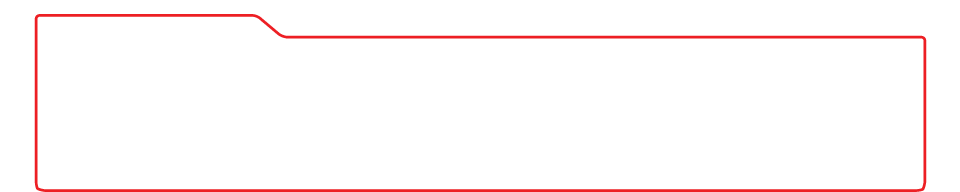
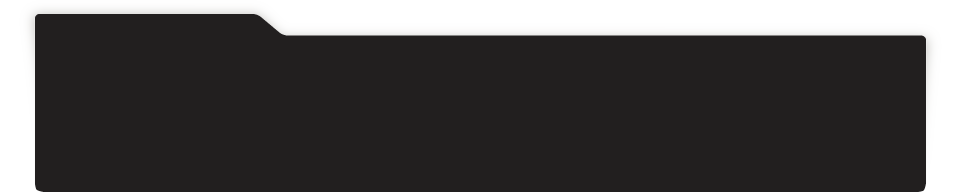
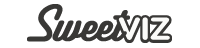
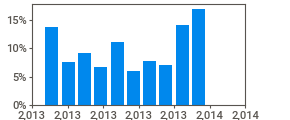
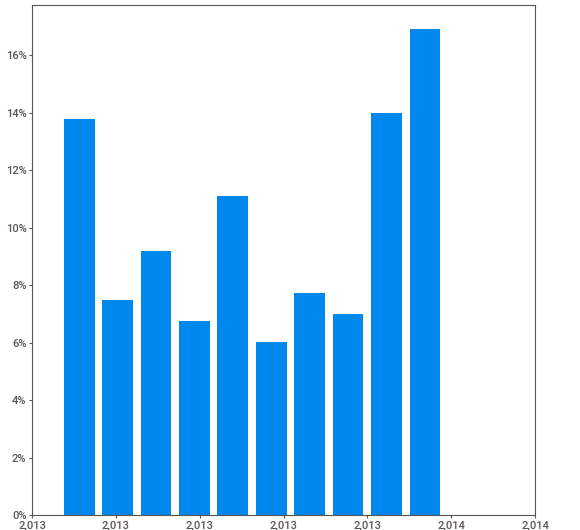
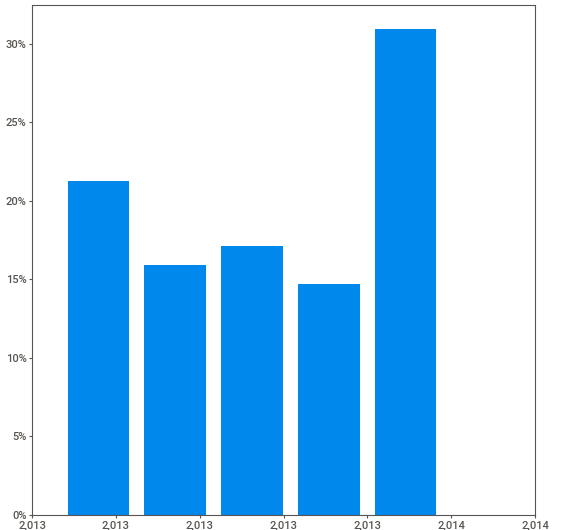
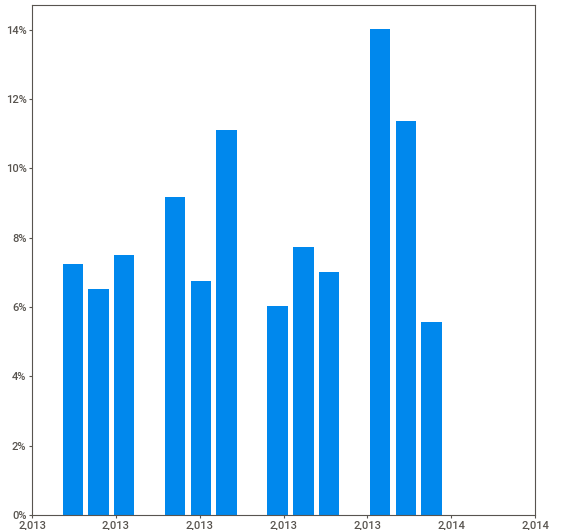
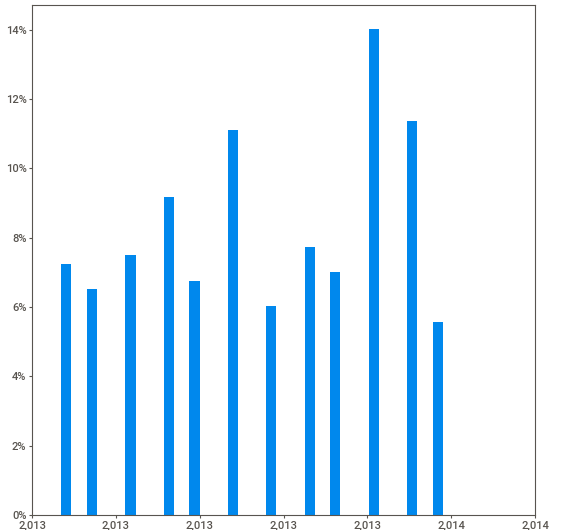
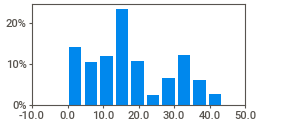
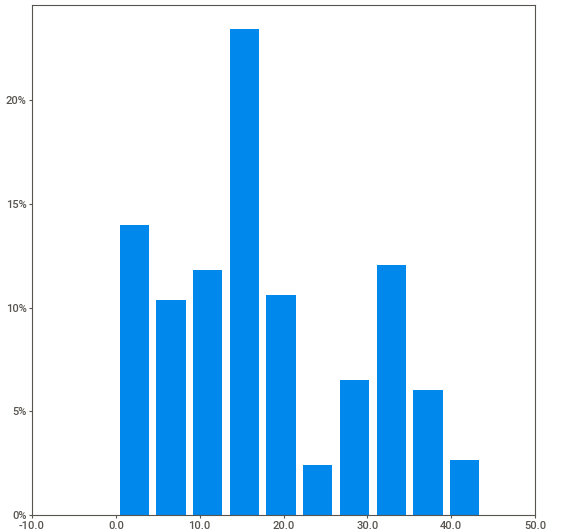
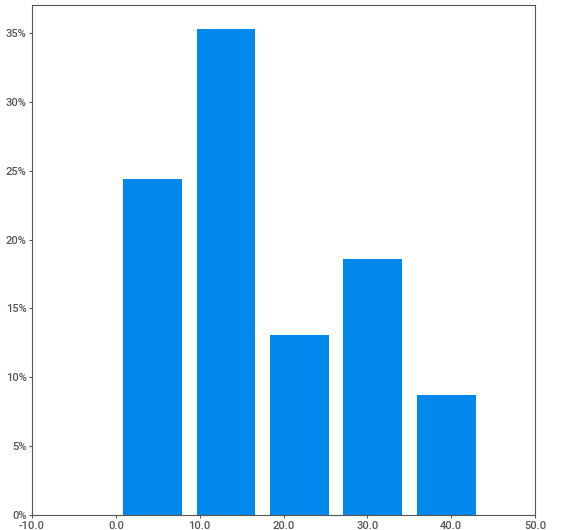
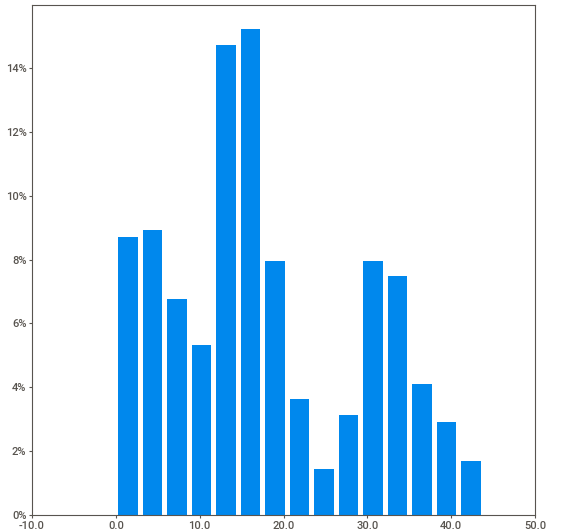
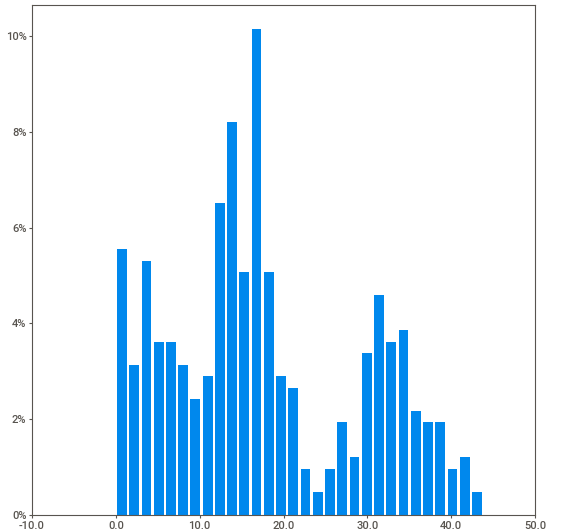
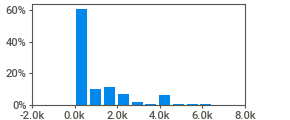
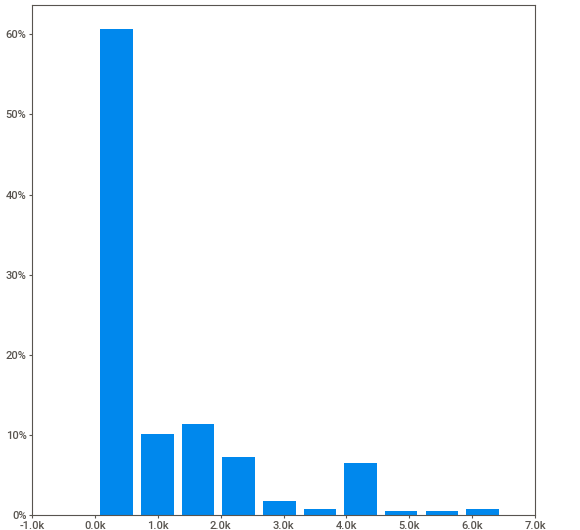
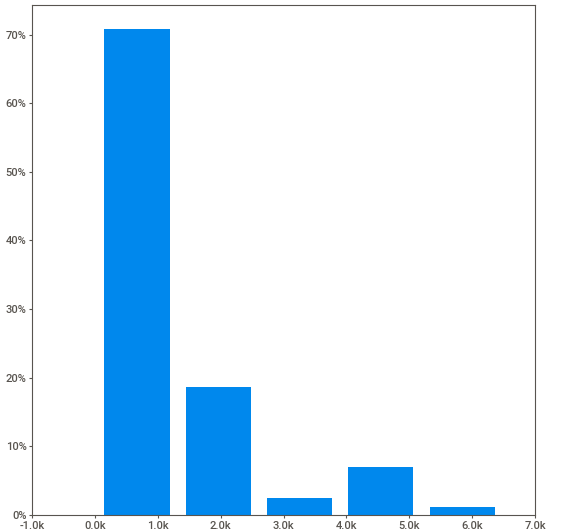
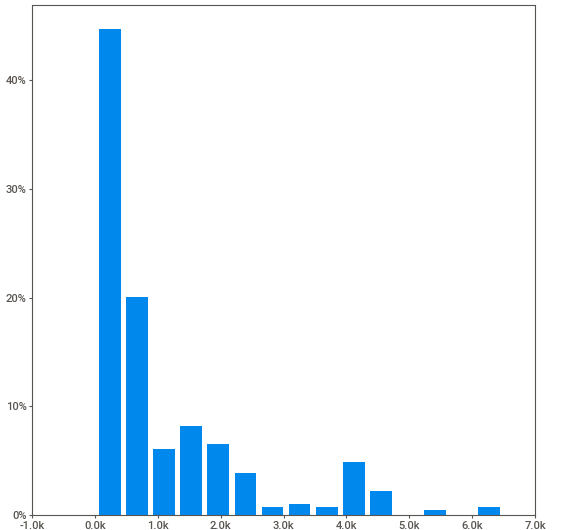
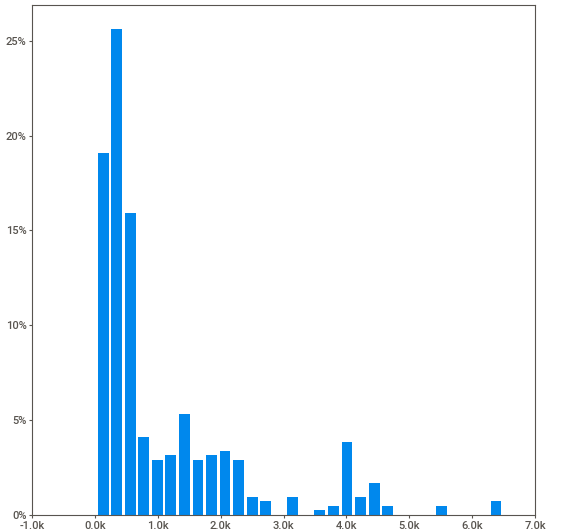
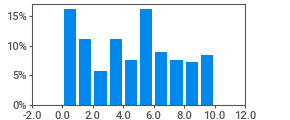
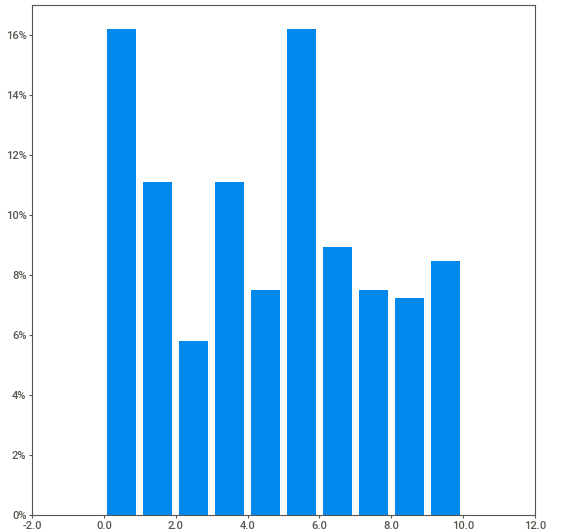
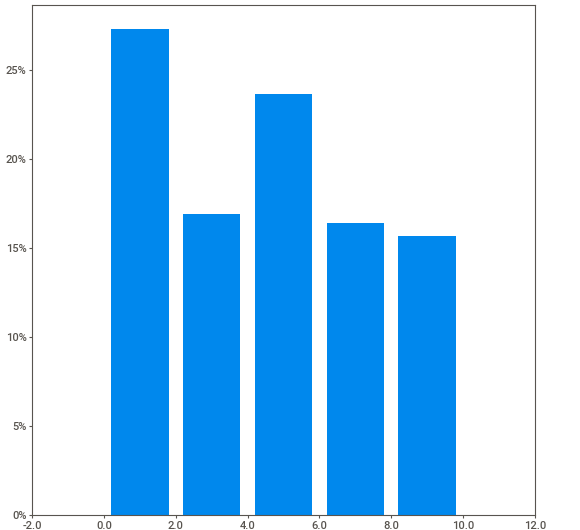
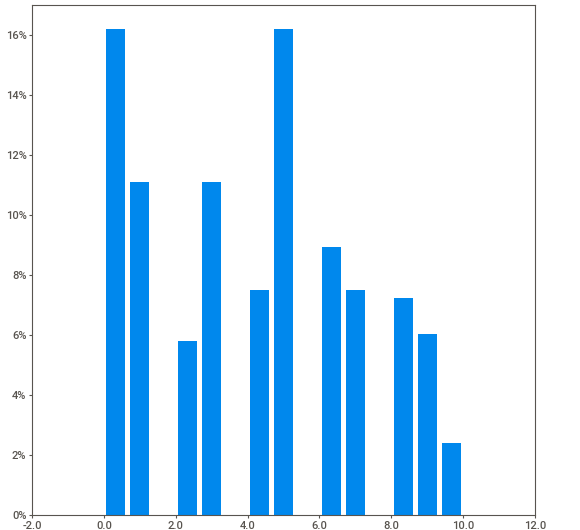
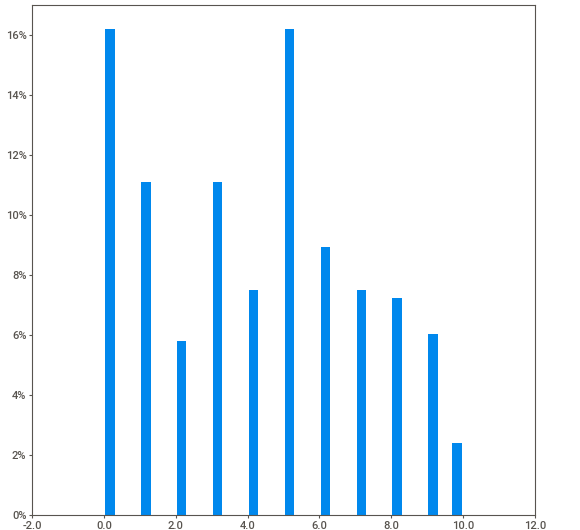
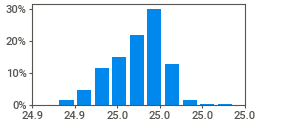
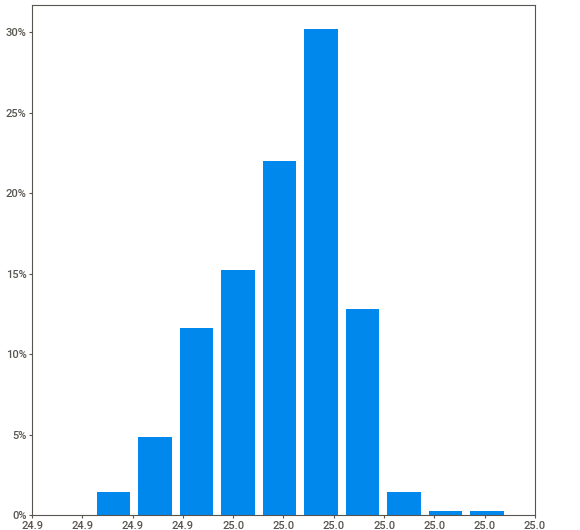
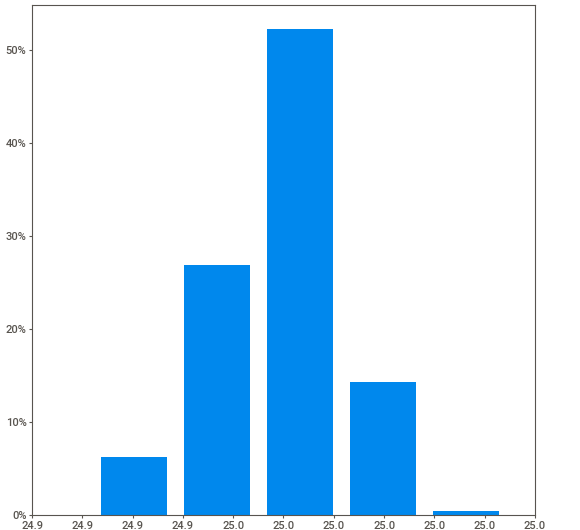
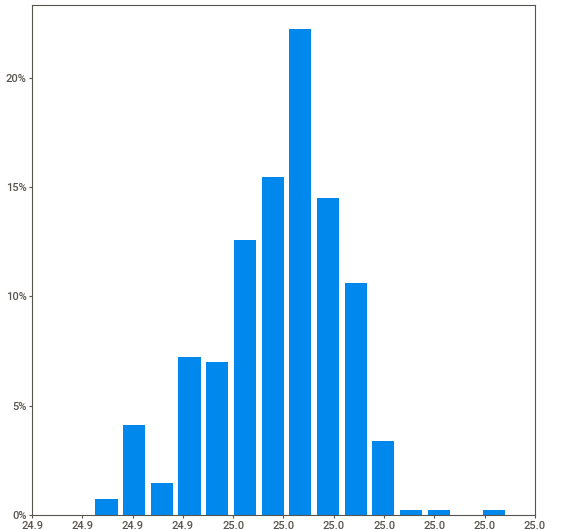
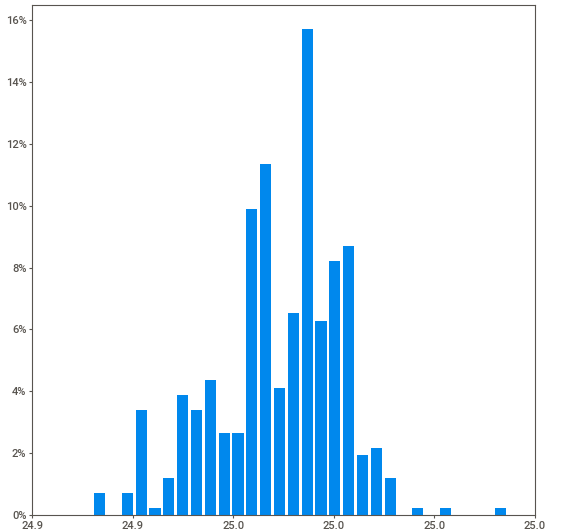
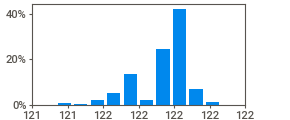
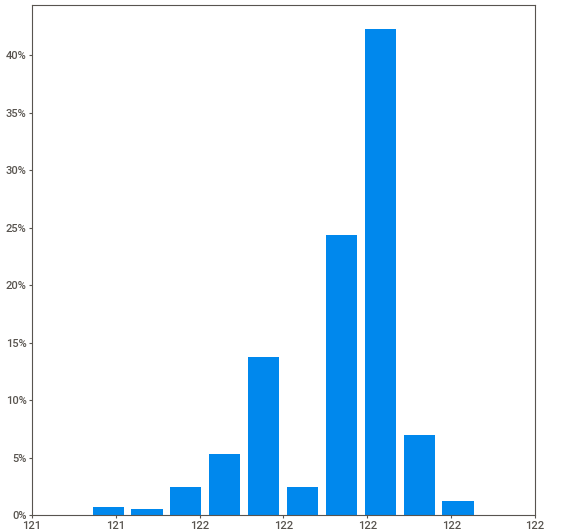
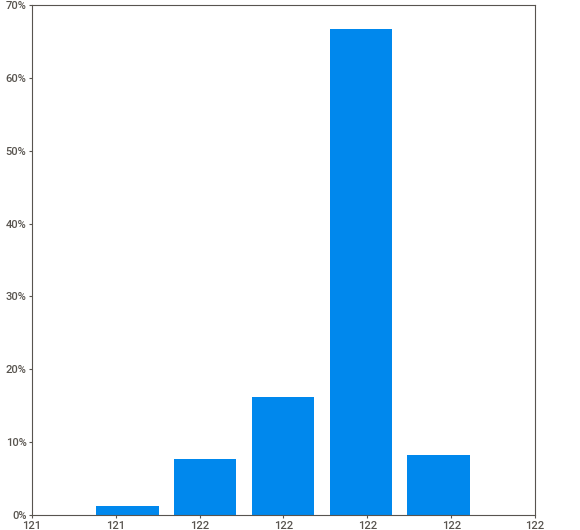
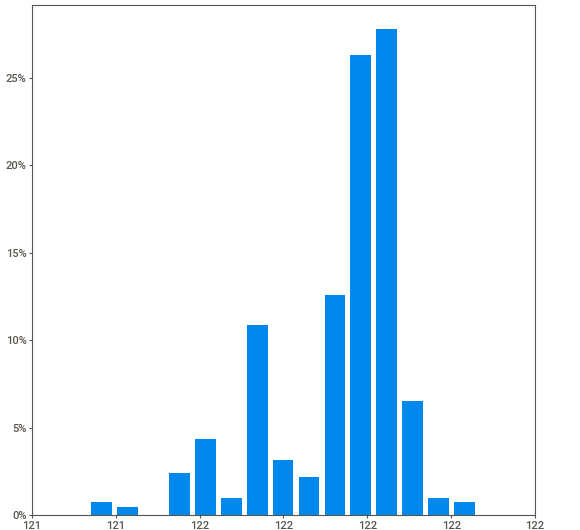
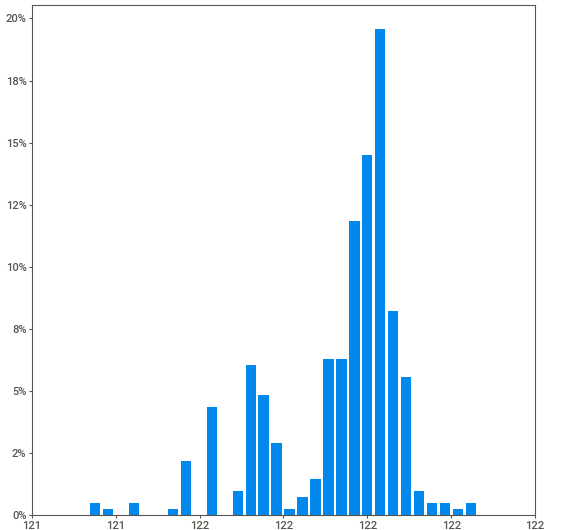
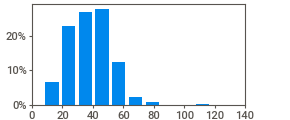
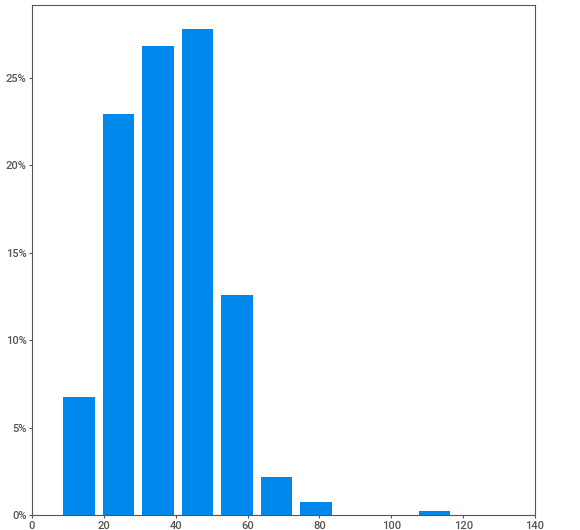
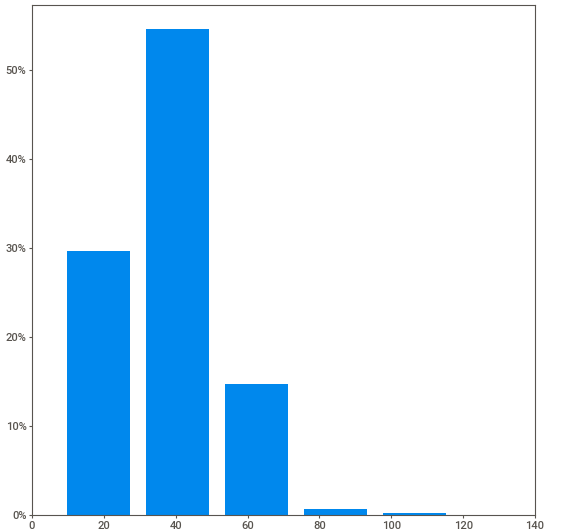
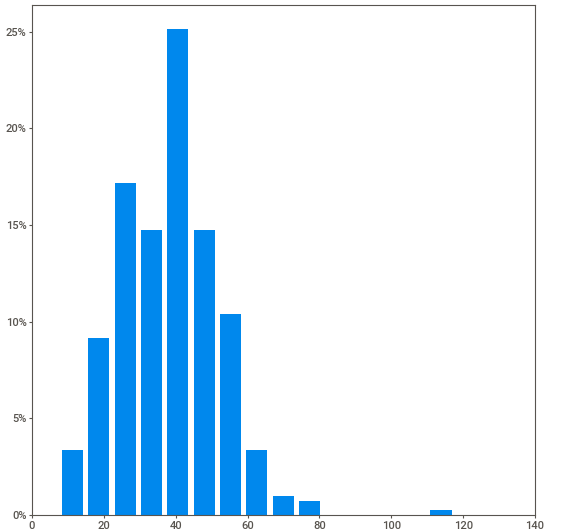
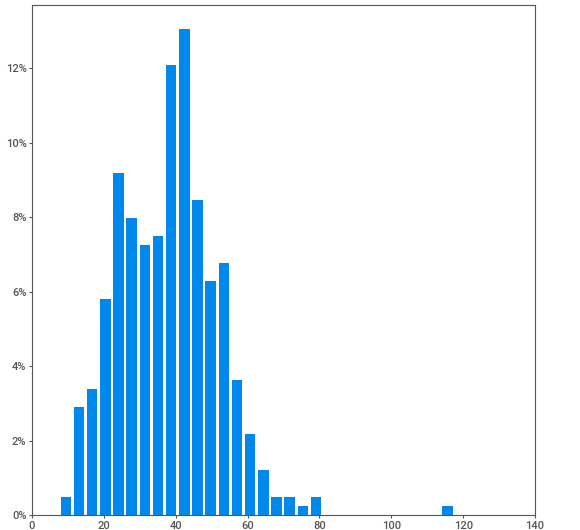
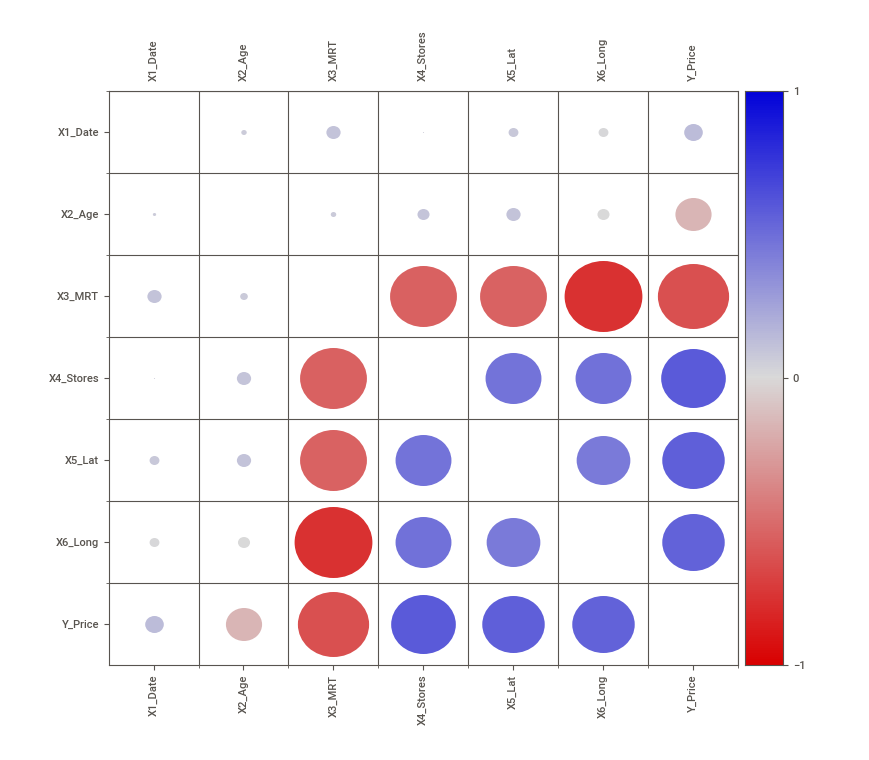
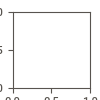

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

In [ ]:
# # AutoViz
# sep = ","
# dataf = AV.AutoViz(file_, depVar = 'Y house price of unit area', sep=",", dfte=None, header=0, verbose=0, lowess=False, chart_format="html", max_rows_analyzed=2000, max_cols_analyzed=20,)

#**Conclusions**

Significant takeaways for this dataset for a regression project are as follows: 
- Small dataset with skewness and outlier issues. No missing values or duplicates. 
- Need to keep as much data as possible.
- Date of transaction and age do not appear to be important predictors.
- The dataset may be missing key predictors such as number of rooms, community amenities, and floor of property (disclosure: I do not know much about the Xindian property market!).



